# Craft a story from the titanic dataset

In [20]:
# import libraries and data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.color_palette("flare", as_cmap=True)

In [2]:
df = pd.read_csv('./data/train.csv')

### Let's take a look at the first few rows

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We can see that there is a column with binary info representing survival, and we have some other data that will play a part in how the outcome played out. 

### What are the min, max and ranges of our columns?

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Are there logical data types for each column?

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Visualizations

##### How many people survived compared to how many did not?

Text(0.5, 1.0, 'Survived Comparison')

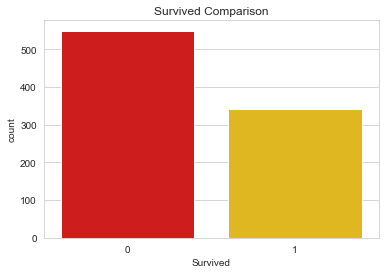

In [42]:
sns.countplot(x='Survived',data=df, palette='hot').set_title('Survived Comparison')

We can see that over 500 (61.6%) people did not survive while only about 350 (38.4%) people survived the Titanic sinking.

##### Compare survived by gender and age

Text(0.5, 0.98, 'Sex vs Pclass')

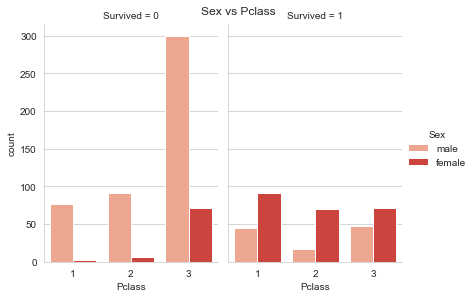

In [59]:
c = sns.catplot(x="Pclass", hue="Sex", col="Survived",
                data=df, kind="count",
                height=4, aspect=.7, palette='Reds')

c.fig.suptitle('Sex vs Pclass')

Looks like over 50% of the non-survivors were males with 3rd class tickets. This seems alarming at first glance, however, if we take a closer look at the data then we can see there is some built-in bias. For example, there are 100% more 3rd class tickets on board than 1st or 2nd class. So, we have to take that into account when noting that more than half the non-survivors were from the 3rd class. In other words.. it is expected simply based on the population.

Text(0.5, 1.0, 'Pclass Counts')

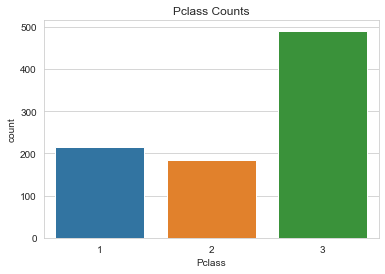

In [62]:
sns.countplot(data=df, x='Pclass').set_title('Pclass Counts')

Visualize above how many 3rd class tickets were on board compared to 1st and 2nd.

##### Compare survived with sibling/spouse and embarked port

Text(0.5, 0.98, 'SibSp vs Parch')

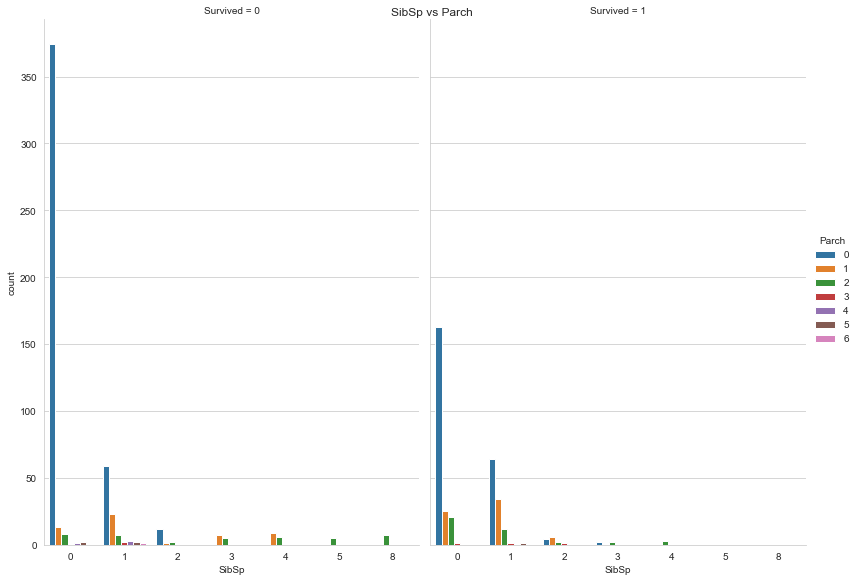

In [69]:
c = sns.catplot(x="SibSp", hue="Parch", col="Survived",
                data=df, kind="count",
                height=8, aspect=.7)

c.fig.suptitle('SibSp vs Parch')

When comparing survivals based on the familial relationships with other people on board, we can see that the people without any parents, siblings or spouse onboard were more likely to not survive.. about 374 out of 549 or 68%.

We crisis hits, having someone you know onboard is a very beneficial relationship to have. 